In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cusersmarildownloadssdg-datasetcsv/sdg_dataset.csv


#Global Goals

"The Sustainable Development Goals (SDGs), also known as the Global Goals, were adopted by the United Nations in 2015 as a universal call to action to end poverty, protect the planet, and ensure that by 2030 all people enjoy peace and prosperity."

https://www.undp.org/sustainable-development-goals#:~:text=What%20are%20the%20Sustainable%20Development,people%20enjoy%20peace%20and%20prosperity.

In [16]:
df = pd.read_csv("/kaggle/input/cusersmarildownloadssdg-datasetcsv/sdg_dataset.csv", delimiter=';', encoding='utf8')
pd.set_option('display.max_columns', None)
df.head()

,iso3_code,country,goal,target,indicator_code,indicator,gender,disaggregation,footnote,source_abbreviation,source,unit_of_measurement,year,value
0,ABW,Aruba,Goal 16,16.1 Significantly reduce all forms of violenc...,16.1.1,16.1.1 Number of victims of intentional homici...,Female,NaN,NaN,WHO,World Health Organization Mortality Database,Counts,1990.0,0
1,ABW,Aruba,Goal 16,16.1 Significantly reduce all forms of violenc...,16.1.1,16.1.1 Number of victims of intentional homici...,Female,NaN,NaN,WHO,World Health Organization Mortality Database,Counts,1995.0,0
2,ABW,Aruba,Goal 16,16.1 Significantly reduce all forms of violenc...,16.1.1,16.1.1 Number of victims of intentional homici...,Female,NaN,NaN,WHO,World Health Organization Mortality Database,Counts,1999.0,1
3,ABW,Aruba,Goal 16,16.1 Significantly reduce all forms of violenc...,16.1.1,16.1.1 Number of victims of intentional homici...,Female,NaN,NaN,WHO,World Health Organization Mortality Database,Counts,2001.0,2
4,ABW,Aruba,Goal 16,16.1 Significantly reduce all forms of violenc...,16.1.1,16.1.1 Number of victims of intentional homici...,Female,NaN,NaN,WHO,World Health Organization Mortality Database,Counts,2002.0,1


#Checking Dataset

In [17]:
# checking dataset

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  28610
Columns  :  14

Features : 
 ['iso3_code', 'country', 'goal', 'target', 'indicator_code', 'indicator', 'gender', 'disaggregation', 'footnote', 'source_abbreviation', 'source', 'unit_of_measurement', 'year', 'value']

Missing values :   52289

Unique values :  
 iso3_code               227
country                 231
goal                      3
target                    9
indicator_code            9
indicator                 9
gender                    3
disaggregation           23
footnote                 53
source_abbreviation      47
source                   71
unit_of_measurement       3
year                     31
value                  5109
dtype: int64


#The United Nations Goals 

Goal 1. End poverty in all its forms everywhere

Goal 2. End hunger, achieve food security and improved nutrition and promote sustainable agriculture

Goal 3. Ensure healthy lives and promote well-being for all at all ages

Goal 4. Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all

Goal 5. Achieve gender equality and empower all women and girls

Goal 6. Ensure availability and sustainable management of water and sanitation for all

Goal 7. Ensure access to affordable, reliable, sustainable and modern energy for all

Goal 8. Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all

Goal 9. Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation

Goal 10. Reduce inequality within and among countries

Goal 11. Make cities and human settlements inclusive, safe, resilient and sustainable

Goal 12. Ensure sustainable consumption and production patterns

Goal 13. Take urgent action to combat climate change and its impacts[b]

Goal 14. Conserve and sustainably use the oceans, seas and marine resources for sustainable development

Goal 15. Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss

Goal 16. Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels

Goal 17. Strengthen the means of implementation and revitalize the Global Partnership for Sustainable Development

https://unstats.un.org/sdgs/metadata/

#Goals

In [18]:
df["goal"].value_counts()

Goal 16    28471
Goal 3       136
2020           3
Name: goal, dtype: int64

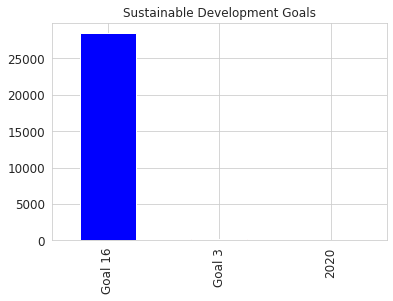

In [28]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil

df["goal"].value_counts().plot.bar(color=['blue', '#f5005a', 'yellow'], title='Sustainable Development Goals');

#Where are the other Goals? Only 16 and 3rd?

#Target

In [26]:
df["target"].value_counts()

16.1 Significantly reduce all forms of violence and related death rates everywhere                                                                                  18497
16.2 End abuse, exploitation, trafficking and all forms of violence against and torture of children                                                                  6428
16.3 Promote the rule of law at the national and international levels and ensure equal access to justice for all                                                     3218
16.5 Substantially reduce corruption and bribery in all their forms                                                                                                   296
3.5 Strengthen the prevention and treatment of substance abuse, including narcotic drug abuse and harmful use of alcohol                                              136
16.4 By 2030, significantly reduce illicit financial and arms flows, strengthen the recovery and return of stolen assets and combat all forms of organ

#Disaggregation

In [19]:
df["disaggregation"].value_counts()

Total detected victims                                                               722
Detected victims of trafficking for sexual exploitaton                               496
Detected victims of trafficking for forced labour, servitude and slavery             458
Detected victims of trafficking for sexual exploitaton_Adults                        408
Detected victims of trafficking for forced labour, servitude and slavery_Adults      404
Detected victims of trafficking for sexual exploitaton_Children                      390
Detected victims of trafficking for other purposes                                   371
Detected victims of trafficking for forced labour, servitude and slavery_Children    358
Total detected victims_Adults                                                        332
Detected victims of trafficking for other purposes_Children                          329
Total detected victims_Children                                                      324
Detected victims of t

In [25]:
df["footnote"].value_counts()

Data in reference to one country but derived from different types of sources should not be compared between them.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       6428
Number of victims of intentional homicide" refer to "Murder & Manslaughter                                                                                                                                                                                                                                                 

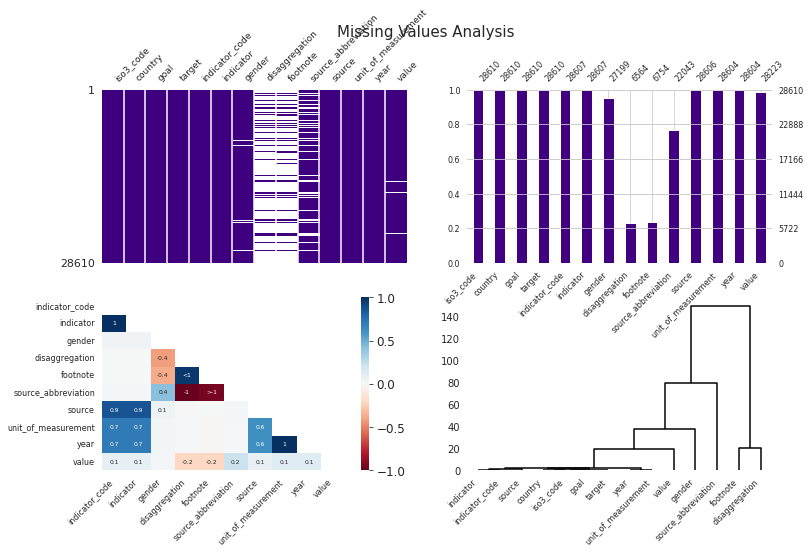

In [20]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);
#plt.tight_layout()

In [21]:
#How can we not like order The Devastator? Is it a code Pyramid? 

import os
import gc
import re
import tqdm
import copy
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.image as mpimg
from IPython.display import display_html
from dask.distributed import Client, wait
import warnings; warnings.filterwarnings("ignore")

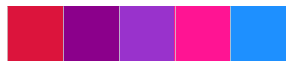

In [22]:
# Color Palette
custom_colors = ['#DC143C', '#8B008B', '#9932CC', '#FF1493', '#1E90FF']#crimson, darkMagenta, DarkOrchid, DeepPink, DodgerBlue
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [23]:
def distplot_features(df, feature, title, color = custom_colors[4], categorical=True):
    '''Takes a column from the dataframe and plots the distribution (after count)'''

    if categorical: values = df[feature].value_counts().values
    else: values = df[feature].values

    print('Mean: {:,}'.format(np.mean(values)), "\n"
          'Median: {:,}'.format(np.median(values)), "\n"
          'Max: {:,}'.format(np.max(values)))

    plt.figure(figsize = (18, 3))

    if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})
    else:
        # To speed up the process
        if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})
        else: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})

    plt.title(title, fontsize=15)
    plt.show()    
    del values
    gc.collect()

#Inspecting Categorical Features

Mean: 9,536.666666666666 
Median: 136.0 
Max: 28,471


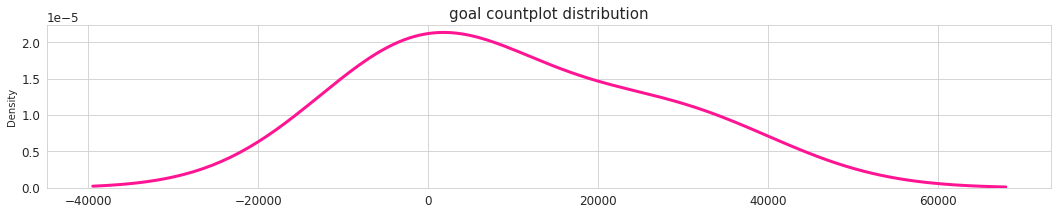

Mean: 3,178.8888888888887 
Median: 136.0 
Max: 18,497


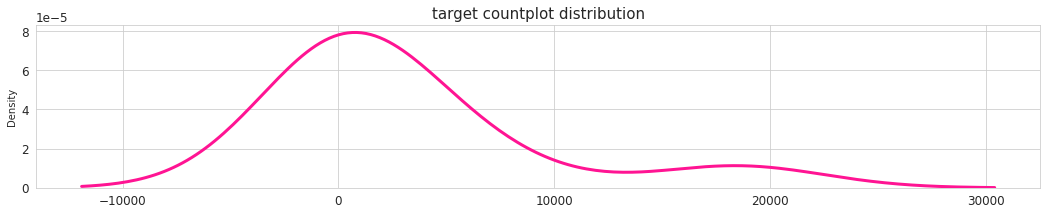

Mean: 9,066.333333333334 
Median: 8,205.0 
Max: 10,968


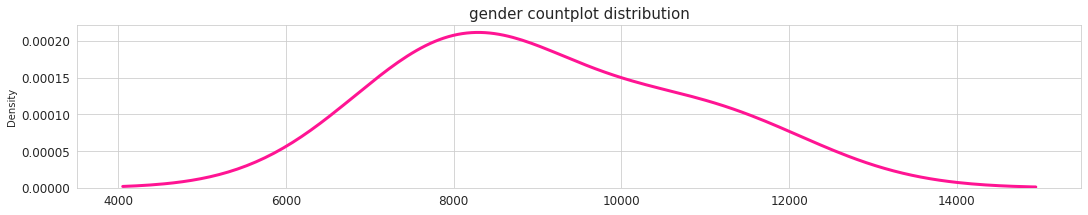

Mean: 3,178.5555555555557 
Median: 640.0 
Max: 17,285


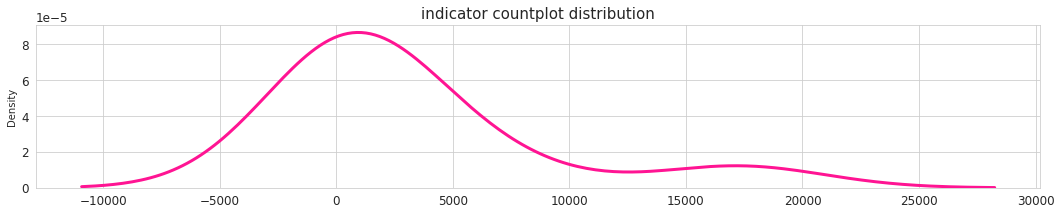

In [24]:
categorical_features = ['goal', 'target', 'gender', 'indicator'] 

for feature in categorical_features:
    distplot_features(df, feature=feature, title = feature + " countplot distribution", color = custom_colors[3], categorical=True)

#Victims of Trafficking Removal of Organs

In [29]:
#Disaggregation, Victims of Trafficking Removal of Organs

organ = df[df['disaggregation'] == 'Detected victims of trafficking for removal of organ']
organ.head()

,iso3_code,country,goal,target,indicator_code,indicator,gender,disaggregation,footnote,source_abbreviation,source,unit_of_measurement,year,value
502,AND,Andorra,Goal 16,"16.2 End abuse, exploitation, trafficking and ...",16.2.2,16.2.2 Number of victims of human trafficking ...,Female,Detected victims of trafficking for removal of...,Data in reference to one country but derived f...,NaN,GLOTIP Database,"Rate per 100,000 population",2015.0,0
503,AND,Andorra,Goal 16,"16.2 End abuse, exploitation, trafficking and ...",16.2.2,16.2.2 Number of victims of human trafficking ...,Female,Detected victims of trafficking for removal of...,Data in reference to one country but derived f...,NaN,GLOTIP Database,"Rate per 100,000 population",2016.0,0
504,AND,Andorra,Goal 16,"16.2 End abuse, exploitation, trafficking and ...",16.2.2,16.2.2 Number of victims of human trafficking ...,Female,Detected victims of trafficking for removal of...,Data in reference to one country but derived f...,NaN,GLOTIP Database,"Rate per 100,000 population",2017.0,0
505,AND,Andorra,Goal 16,"16.2 End abuse, exploitation, trafficking and ...",16.2.2,16.2.2 Number of victims of human trafficking ...,Female,Detected victims of trafficking for removal of...,Data in reference to one country but derived f...,NaN,GLOTIP Database,"Rate per 100,000 population",2018.0,0
556,AND,Andorra,Goal 16,"16.2 End abuse, exploitation, trafficking and ...",16.2.2,16.2.2 Number of victims of human trafficking ...,Male,Detected victims of trafficking for removal of...,Data in reference to one country but derived f...,NaN,GLOTIP Database,"Rate per 100,000 population",2015.0,0


#Detected victims of trafficking for removal of organ

In [31]:
organ["disaggregation"].value_counts()

Detected victims of trafficking for removal of organ    215
Name: disaggregation, dtype: int64

#That's all for now.